In [381]:
from matplotlib import pyplot as plt
import cv2
from ipywidgets import interact, FloatSlider

In [382]:
from classes import *

In [383]:
def get_extrinsic_matrix(rx, ry, rz, tx, ty, tz):
  """
  Create an extrinsic matrix with given rotation and translation.
  
  Parameters:
    rx, ry, rz: Rotation angles (in degrees) around X, Y, and Z axes.
    tx, ty, tz: Translation along X, Y, and Z axes.
    
  Returns:
    extrinsic_matrix: 3x4 combined rotation and translation matrix.
  """
  rx, ry, rz = np.radians([rx, ry, rz])
  
  # Rotation matrices
  R_x = np.array([
    [1, 0, 0],
    [0, np.cos(rx), -np.sin(rx)],
    [0, np.sin(rx), np.cos(rx)]
  ])
  R_y = np.array([
    [np.cos(ry), 0, np.sin(ry)],
    [0, 1, 0],
    [-np.sin(ry), 0, np.cos(ry)]
  ])
  R_z = np.array([
    [np.cos(rz), -np.sin(rz), 0],
    [np.sin(rz), np.cos(rz), 0],
    [0, 0, 1]
  ])
  
  # Combined rotation
  R = R_x @ R_y @ R_z
  
  # Translation vector
  t = np.array([[tx], [ty], [tz]])
  
  # Extrinsic matrix
  return np.hstack((R, t))

In [384]:
def update_projection(road: RoadSegment, intrinsic_matrix, rx=0, ry=0, rz=0, tx=0, ty=0, tz=500):
  """
  Update the road projection with new camera parameters.
  
  Parameters:
    rx, ry, rz: Rotation angles around X, Y, Z axes.
    tx, ty, tz: Translation along X, Y, Z axes.
  """
  # Get extrinsic matrix
  extrinsic_matrix = get_extrinsic_matrix(rx, ry, rz, tx, ty, tz)
  
  # Compute projection matrix
  projection_matrix = intrinsic_matrix @ extrinsic_matrix
  
  # Project the road
  projected_road = road.project(projection_matrix)
  
  # Create a blank image
  image = np.zeros((1000, 1500, 3), dtype=np.uint8) + 100
  
  # Draw the projected road
  projected_road.draw(image)
  
  # Display the image
  plt.figure(figsize=(10, 10))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(f"Projection (rx={rx}, ry={ry}, rz={rz}, tx={tx}, ty={ty}, tz={tz})")
  plt.show()

In [385]:
# Define projection matrix
fx, fy = 200, 200
cx, cy = 100, 100
intrinsic_matrix = np.array([
  [fx, 0, cx],
  [0, fy, cy],
  [0, 0, 1]
])
R = np.eye(3)
t = np.array([[-130], [130], [410]])
extrinsic_matrix = np.hstack((R, t))
projection_matrix = intrinsic_matrix @ extrinsic_matrix

In [386]:

# Define intrinsic parameters
fx, fy = 200, 200
cx, cy = 100, 100
intrinsic_matrix_angled = np.array([
  [fx, 0, cx],
  [0, fy, cy],
  [0, 0, 1]
])

# Define extrinsic parameters
angles_deg_new = np.array([-60, 0, 0])

rx, ry, rz = np.radians(angles_deg_new)
  
  # Rotation matrices
R_x = np.array([
  [1, 0, 0],
  [0, np.cos(rx), -np.sin(rx)],
  [0, np.sin(rx), np.cos(rx)]
])
R_y = np.array([
  [np.cos(ry), 0, np.sin(ry)],
  [0, 1, 0],
  [-np.sin(ry), 0, np.cos(ry)]
])
R_z = np.array([
  [np.cos(rz), -np.sin(rz), 0],
  [np.sin(rz), np.cos(rz), 0],
  [0, 0, 1]
])
  
# Combined rotation
R = R_x @ R_y @ R_z

# Combine rotation with translation
t = np.array([[0], [0], [500]])  # Camera is above and behind the road
extrinsic_matrix_angled = np.hstack((R, t))

# Compute the projection matrix
projection_matrix_angled = intrinsic_matrix_angled @ extrinsic_matrix_angled

In [387]:
road = RoadSegmentGenerator.generate(lane_width=100, road_center=Point(x=150,y=500,z=0))

In [388]:
projection = road.project(projection_matrix)

In [389]:
projection_angled = road.project(projection_matrix_angled)

In [390]:
road

RoadSegment(lines=[SolidLine(start=Point(x=150.0, y=500.0, z=0.0), end=Point(x=150.0, y=1300.0, z=0.0)), DoubleLine(start=Point(x=250.0, y=500.0, z=0.0), end=Point(x=250.0, y=1300.0, z=0.0)), DashedLine(start=Point(x=350.0, y=500.0, z=0.0), end=Point(x=350.0, y=1300.0, z=0.0)), YellowLine(start=Point(x=450.0, y=500.0, z=0.0), end=Point(x=450.0, y=1300.0, z=0.0))])

In [391]:
projection

RoadSegment(lines=[SolidLine(start=Point(x=109.0, y=407.0, z=None), end=Point(x=109.0, y=797.0, z=None)), DoubleLine(start=Point(x=158.0, y=407.0, z=None), end=Point(x=158.0, y=797.0, z=None)), DashedLine(start=Point(x=207.0, y=407.0, z=None), end=Point(x=207.0, y=797.0, z=None)), YellowLine(start=Point(x=256.0, y=407.0, z=None), end=Point(x=256.0, y=797.0, z=None))])

In [392]:
projection_angled

RoadSegment(lines=[SolidLine(start=Point(x=547.0, y=846.0, z=None), end=Point(x=52.0, y=-107.0, z=None)), DoubleLine(start=Point(x=846.0, y=846.0, z=None), end=Point(x=20.0, y=-107.0, z=None)), DashedLine(start=Point(x=1144.0, y=846.0, z=None), end=Point(x=-11.0, y=-107.0, z=None)), YellowLine(start=Point(x=1443.0, y=846.0, z=None), end=Point(x=-43.0, y=-107.0, z=None))])

In [393]:
# Create a blank image
image = np.zeros((1000, 1500, 3), dtype=np.uint8) + 100

In [394]:
# Draw the projected road segment directly using its draw method
projection.draw(image)

In [395]:
# # Display the image in Jupyter Notebook
# plt.figure(figsize=(10, 10))
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.title("Projected Road")
# plt.show()

In [396]:
image_angled = np.zeros((1000, 1500, 3), dtype=np.uint8) + 100

In [397]:
projection_angled.draw(image_angled)

In [398]:
# Create a blank image
image_original = np.zeros((1000, 1000, 3), dtype=np.uint8) + 100

In [399]:
road.draw(image_original)

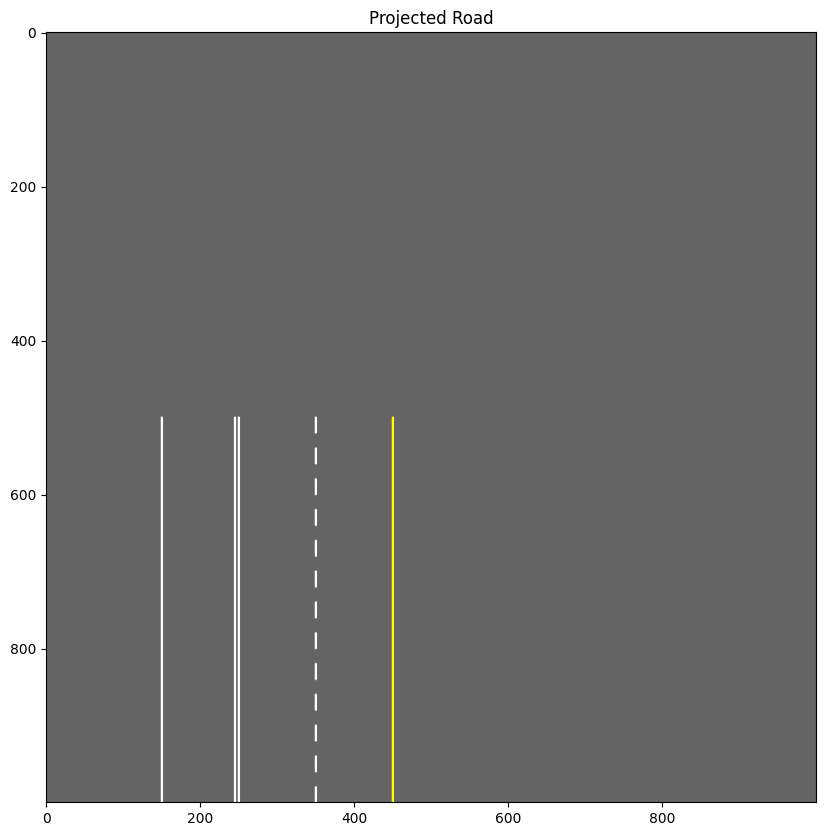

In [400]:
# Display the image in Jupyter Notebook
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB))
plt.title("Projected Road")
plt.show()

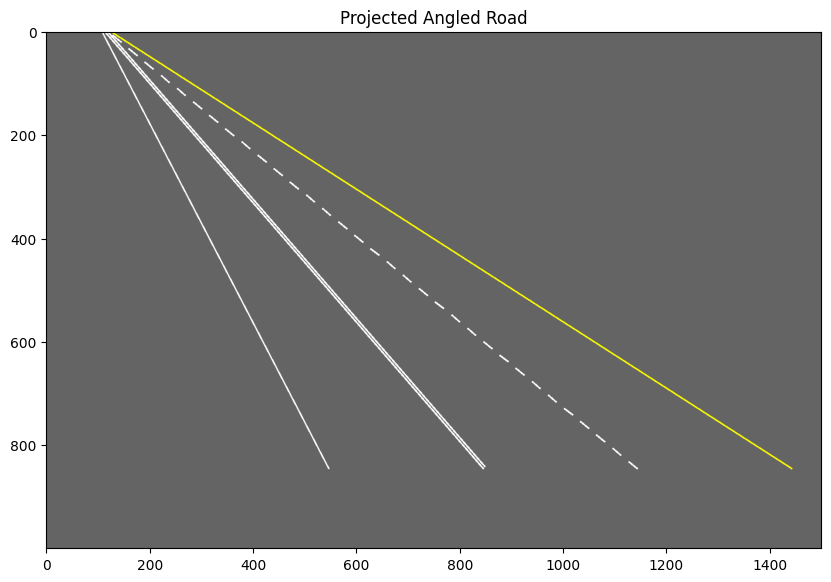

In [401]:
# Display the image in Jupyter Notebook
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_angled, cv2.COLOR_BGR2RGB))
plt.title("Projected Angled Road")
plt.show()

In [402]:
update_projection_prepared = lambda rx=0, ry=0, rz=0, tx=0, ty=0, tz=500: update_projection(
  road, intrinsic_matrix, rx=rx, ry=ry, rz=rz, tx=tx, ty=ty, tz=tz
)

In [403]:
interact(
  update_projection_prepared,
  rx=FloatSlider(min=-180, max=180, step=1, value=-60, description="Rotate X"),
  ry=FloatSlider(min=-180, max=180, step=1, value=0, description="Rotate Y"),
  rz=FloatSlider(min=-180, max=180, step=1, value=0, description="Rotate Z"),
  tx=FloatSlider(min=-1000, max=1000, step=10, value=0, description="Translate X"),
  ty=FloatSlider(min=-1000, max=1000, step=10, value=0, description="Translate Y"),
  tz=FloatSlider(min=-1000, max=1000, step=10, value=500, description="Translate Z")
)

interactive(children=(FloatSlider(value=-60.0, description='Rotate X', max=180.0, min=-180.0, step=1.0), Float…

<function __main__.<lambda>(rx=0, ry=0, rz=0, tx=0, ty=0, tz=500)>